In [1]:
# Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2
from tqdm import tqdm

In [3]:
# Step 2: Define the KolmogorovSolver class

class KolmogorovSolver:
    def __init__(self, N, viscosity, forcing_amplitude):
        # Initialize grid size, viscosity, and forcing amplitude
        self.N = N
        self.viscosity = viscosity
        self.forcing_amplitude = forcing_amplitude
        
        # Generate wave number grids
        self.kx = np.fft.fftfreq(N, 1.0 / N)
        self.ky = np.fft.fftfreq(N, 1.0 / N)
        self.kx, self.ky = np.meshgrid(self.kx, self.ky)
        self.k2 = self.kx ** 2 + self.ky ** 2
        self.k2[0, 0] = 1.0  # To avoid division by zero at k = 0

    def forcing(self):
        # Define external forcing (Kolmogorov forcing)
        return np.sin(4 * np.pi * self.ky / self.N)

    def time_step(self, u_hat, v_hat, dt):
        # Compute nonlinear terms
        u = np.real(ifft2(u_hat))
        v = np.real(ifft2(v_hat))
        u_x = np.real(ifft2(1j * self.kx * u_hat))
        u_y = np.real(ifft2(1j * self.ky * u_hat))
        v_x = np.real(ifft2(1j * self.kx * v_hat))
        v_y = np.real(ifft2(1j * self.ky * v_hat))
        
        nonlinear_u = u * u_x + v * u_y
        nonlinear_v = u * v_x + v * v_y

        # Update Fourier coefficients with nonlinear terms, viscosity, and forcing
        u_hat_new = (u_hat - dt * fft2(nonlinear_u)) / (1.0 + dt * self.viscosity * self.k2)
        v_hat_new = (v_hat - dt * fft2(nonlinear_v)) / (1.0 + dt * self.viscosity * self.k2)
        u_hat_new += dt * self.forcing()  # Add external forcing

        return u_hat_new, v_hat_new

    def solve(self, num_steps, dt):
        # Initialize Fourier coefficients for velocity components
        u_hat = np.zeros((self.N, self.N), dtype=np.complex128)
        v_hat = np.zeros((self.N, self.N), dtype=np.complex128)

        # Add small random perturbations to initial conditions
        u_hat += 0.01 * (np.random.randn(self.N, self.N) + 1j * np.random.randn(self.N, self.N))
        v_hat += 0.01 * (np.random.randn(self.N, self.N) + 1j * np.random.randn(self.N, self.N))

        # Arrays to store velocity fields over time
        u_data = []
        v_data = []
        
        # Time-stepping loop
        for _ in tqdm(range(num_steps)):
            u_hat, v_hat = self.time_step(u_hat, v_hat, dt)
            u = np.real(ifft2(u_hat))
            v = np.real(ifft2(v_hat))
            u_data.append(u)
            v_data.append(v)

        return np.array(u_data), np.array(v_data)

In [4]:
# Step 3: Set the solver parameters

N = 64  # Grid size (number of grid points in each dimension)
viscosity = 0.001  # Fluid viscosity
forcing_amplitude = 1.0  # Amplitude of the external forcing
num_steps = 500  # Number of time steps to simulate
dt = 0.01  # Time step size

# Initialize the Kolmogorov solver with the parameters
solver = KolmogorovSolver(N, viscosity, forcing_amplitude)

In [7]:
# Step 4: Run the solver to generate data

# Generate data for velocity fields u and v
u_data, v_data = solver.solve(num_steps, dt)

# Save the generated data to .npy files for later use
np.save('u_data.npy', u_data)
np.save('v_data.npy', v_data)

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 184.13it/s]


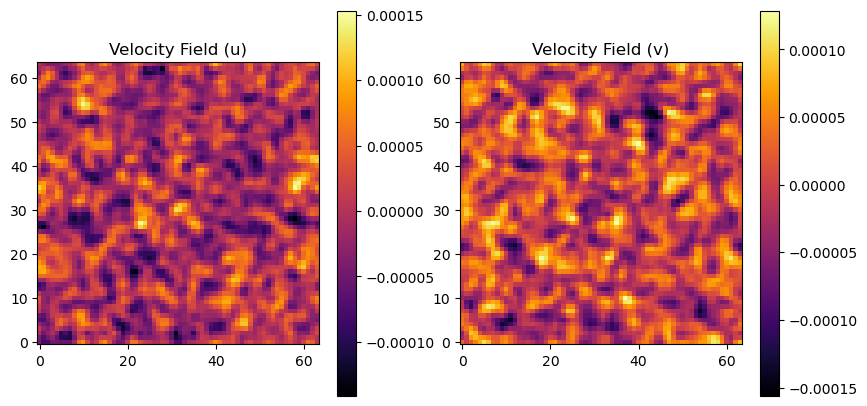

In [9]:
# Step 5: Visualize the results

plt.figure(figsize=(10, 5))

# Plot the u-velocity field
plt.subplot(1, 2, 1)
plt.title("Velocity Field (u)")
plt.imshow(u_data[-1], origin='lower', cmap='inferno')
plt.colorbar()

# Plot the v-velocity field
plt.subplot(1, 2, 2)
plt.title("Velocity Field (v)")
plt.imshow(v_data[-1], origin='lower', cmap='inferno')
plt.colorbar()

plt.show()

In [11]:
pip install sindy

Note: you may need to restart the kernel to use updated packages.


E:\Anaconda\Lib\site-packages\pysindy\optimizers\stlsq.py:191: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(


(x0)' = 0.000
(x1)' = 0.000
(x2)' = 0.000
(x3)' = 0.000
(x4)' = 0.000
(x5)' = 0.000
(x6)' = 0.000
(x7)' = 0.000
(x8)' = 0.000
(x9)' = 0.000
(x10)' = 0.000
(x11)' = 0.000
(x12)' = 0.000
(x13)' = 0.000
(x14)' = 0.000
(x15)' = 0.000
(x16)' = 0.000
(x17)' = 0.000
(x18)' = 0.000
(x19)' = 0.000
(x20)' = 0.000
(x21)' = 0.000
(x22)' = 0.000
(x23)' = 0.000
(x24)' = 0.000
(x25)' = 0.000
(x26)' = 0.000
(x27)' = 0.000
(x28)' = 0.000
(x29)' = 0.000
(x30)' = 0.000
(x31)' = 0.000
(x32)' = 0.000
(x33)' = 0.000
(x34)' = 0.000
(x35)' = 0.000
(x36)' = 0.000
(x37)' = 0.000
(x38)' = 0.000
(x39)' = 0.000
(x40)' = 0.000
(x41)' = 0.000
(x42)' = 0.000
(x43)' = 0.000
(x44)' = 0.000
(x45)' = 0.000
(x46)' = 0.000
(x47)' = 0.000
(x48)' = 0.000
(x49)' = 0.000
(x50)' = 0.000
(x51)' = 0.000
(x52)' = 0.000
(x53)' = 0.000
(x54)' = 0.000
(x55)' = 0.000
(x56)' = 0.000
(x57)' = 0.000
(x58)' = 0.000
(x59)' = 0.000
(x60)' = 0.000
(x61)' = 0.000
(x62)' = 0.000
(x63)' = 0.000
(x64)' = 0.000
(x65)' = 0.000
(x66)' = 0.000
(x67)

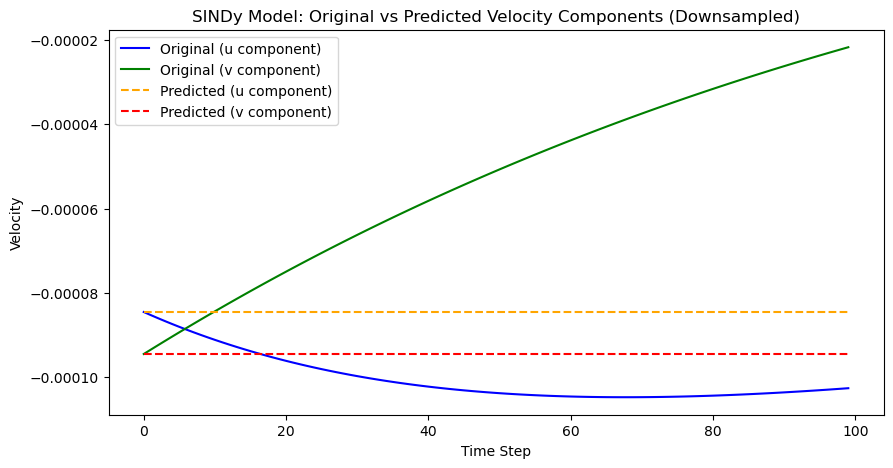

In [15]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pysindy as ps
import matplotlib.pyplot as plt

# Load the saved u_data and v_data arrays
u_data = np.load('u_data.npy')
v_data = np.load('v_data.npy')

# Downsample the data: Select a 16x16 patch from each 64x64 grid
u_data_downsampled = u_data[:, :16, :16]
v_data_downsampled = v_data[:, :16, :16]

# Prepare the data for SINDy by flattening spatial dimensions
num_time_steps, grid_size, _ = u_data_downsampled.shape
flattened_data = np.hstack([u_data_downsampled.reshape(num_time_steps, -1), v_data_downsampled.reshape(num_time_steps, -1)])

# Scale data for SINDy input
scaler = StandardScaler()
flattened_data_scaled = scaler.fit_transform(flattened_data)

# Initialize and fit the SINDy model
sindy_model = ps.SINDy()
sindy_model.fit(flattened_data_scaled, t=0.01)

# Print identified model equations
sindy_model.print()

# Predict with SINDy
predicted_data_scaled = sindy_model.simulate(flattened_data_scaled[0], t=np.arange(0, num_time_steps * 0.01, 0.01))
predicted_data = scaler.inverse_transform(predicted_data_scaled)

# Plot original vs predicted data
plt.figure(figsize=(10, 5))

# Select a subset of grid points to plot for clarity
grid_points_to_plot = 100  # Adjust this number as needed

# Plot for a selected grid point in original and predicted data
plt.plot(flattened_data[:grid_points_to_plot, 0], label="Original (u component)", color='blue')
plt.plot(flattened_data[:grid_points_to_plot, flattened_data.shape[1] // 2], label="Original (v component)", color='green')
plt.plot(predicted_data[:grid_points_to_plot, 0], '--', label="Predicted (u component)", color='orange')
plt.plot(predicted_data[:grid_points_to_plot, flattened_data.shape[1] // 2], '--', label="Predicted (v component)", color='red')

plt.xlabel("Time Step")
plt.ylabel("Velocity")
plt.title("SINDy Model: Original vs Predicted Velocity Components (Downsampled)")
plt.legend()
plt.show()
